# TP: Create a model capable of predicting building energy loss

A machine learning application that predicts a house’s energy loss can drive business value across real estate, construction, energy, and insurance sectors. It enables better property valuation, targeted energy-efficient renovations, optimized energy distribution, and smart home automation, while also helping insurers assess risks and governments allocate subsidies effectively. By reducing costs, improving customer engagement, and supporting sustainability goals, such a tool enhances both profitability and regulatory compliance for businesses.

# Package import

In [ ]:
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix
import seaborn as sns

Before starting please import the TP files via the link below:

https://drive.google.com/drive/folders/1vk37MxNf9s8KtftcbkLyBZV1rMSS7CSs?usp=sharing

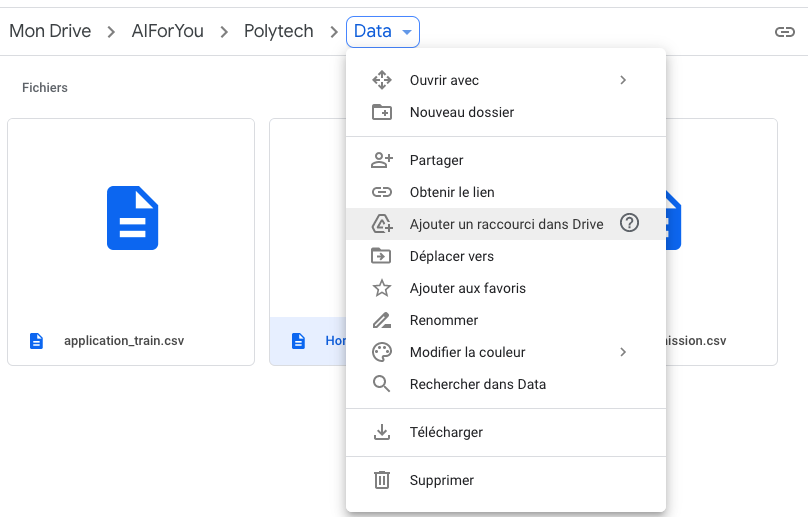

Add a shortcut to your drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

# Data import

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/DPE_Data/data.csv')

Drop some unsed feature.

In [ ]:
drop_col = ["primary_energy_consumption",
            "greenhouse_gaz_emission",
            "wall_losses_performance",
            "low_floor_losses_performance",
            "carpentry_losses_performance",
            "high_ceiling_losses_performance",
            "greenhouse_gaz_emission_letter_int",
            "greenhouse_gaz_emission_letter",
            "diagnosis_number",
            "air_renewal_losses",
            "wall_losses",
            "low_floor_losses",
            "high_ceiling_losses",
            "window_losses",
            "door_losses",
            "thermal_bridge_losses",
            "global_envelope_losses",
            "global_envelope_losses_performance",
            "domestic_hot_water_is_individual",
            "door_surface", "low_floor_type", "type_of_high_ceiling"]

In [ ]:
data = data.drop(columns=drop_col)
data.columns

# Data analysis

Missing values

When we don't have the answer to a qualitative variable, we'll choose the worst option in terms of isolation.

For quantitative variables, we will impute by the median

In [ ]:
np.sum(data.isna(), axis=0)

Create a list of quantitative variables

In [ ]:
num_col = ["living_area",
           "level_nb",
           "window_nb",
           "french_window_nb",
           "door_nb"]

Calculate descriptive statistics for all quantitative values.

In [ ]:
for col in num_col:
    print(f"Name: {col}")
    print(f"Minimum: {data[col].min()}")
    print(f"Maximum: {data[col].max()}")
    print(f"Median: {data[col].median()}")
    print(f"Mean: {data[col].mean()}")
    print(f"Standard deviation: {data[col].std()}")
    print('----------')

Imputation of quantitative variables using the median.

In [ ]:
# Impute missing values in 'high_ceiling_surface' with the median
median_high_ceiling_surface = data['high_ceiling_surface'].median()
data['high_ceiling_surface'] = data['high_ceiling_surface'].fillna(median_high_ceiling_surface)

# Impute missing values in 'low_floor_surface' with the median
median_high_ceiling_surface = data['low_floor_surface'].median()
data['low_floor_surface'] = data['low_floor_surface'].fillna(median_high_ceiling_surface)

# Impute missing values in 'wall_surface' with the median
median_high_ceiling_surface = data['wall_surface'].median()
data['wall_surface'] = data['wall_surface'].fillna(median_high_ceiling_surface)

Compute the mission value

In [ ]:
np.sum(data.isna(), axis=0)

## Examination of each qualitative variable

### Construction range

Before 1948 → Returns 1

From 1948 to 1974 → Returns 2

From 1975 to 1982 → Returns 3

From 1983 to 2000 → Returns 4

From 2001 to 2012 → Returns 5

After 2012 → 6

In [ ]:
print("Name: construction_range_year")
print(data["construction_range_year"].value_counts())

imputation of construction range year by the worst years.

In [ ]:
data['construction_range_year'] = data['construction_range_year'].fillna(1)

Check if the missing value problem is fixed.

In [ ]:
np.sum(data.isna(), axis=0)

### Climatic zone

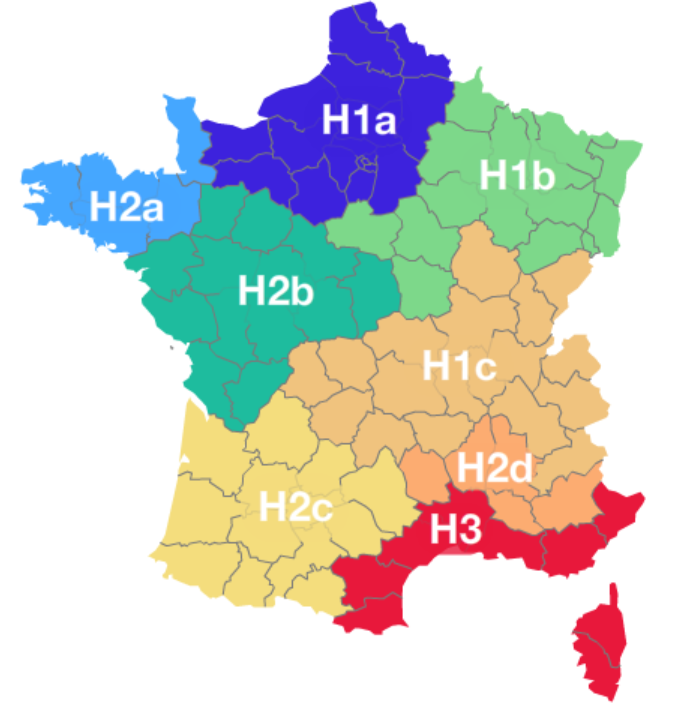

H1a -> 1

H1b -> 2

H1c -> 3

H2a -> 4

H2b -> 5

H2c -> 6

H2d -> 7

H3 -> 8

In [ ]:
print("Name: climatic_zone")
print(data["climatic_zone"].value_counts())

### Heating generator

Electric boiler -> 1
        
Other -> 2

Oil boiler -> 3

heat pump -> 4

Wood-fired boiler -> 5

Heating network -> 6

Toaster -> 7

Underfloor heating -> 8
    
Radiant panel -> 9

Gas boiler -> 10

In [ ]:
print("Name: heating_generator")
print(data["heating_generator"].value_counts())

In [ ]:
data['heating_generator'] = data['heating_generator'].fillna(2)

In [ ]:
np.sum(data.isna(), axis=0)

### Heating energy type

Electricity -> 6

Natural gas -> 5

District heating -> 4

Heating oil -> 3

Wood -> 2

Other -> 1

In [ ]:
print("Name: heating_energy_type")
print(data["heating_energy_type"].value_counts())

In [ ]:
data['heating_energy_type'] = data['heating_energy_type'].fillna(1)

In [ ]:
np.sum(data.isna(), axis=0)

### Domestic hot water generator

Other -> 1

Thermodynamic tank -> 2

Heating network -> 3

Gas water heater -> 4

Electric boiler -> 5

In [ ]:
print("Name: domestic_hot_water_generator")
print(data["domestic_hot_water_generator"].value_counts())

In [ ]:
data['domestic_hot_water_generator'] = data['domestic_hot_water_generator'].fillna(1)

In [ ]:
np.sum(data.isna(), axis=0)

### Heating is individual

Yes -> 1

No -> 0

In [ ]:
print("Name: heating_is_individual")
print(data["heating_is_individual"].value_counts())

### Ceiling height

Ceilling height < 2.5 ->

Ceilling height == 2.5 -> 2

Ceilling height > 2.5 -> 3

Note: the norm is a ceiling height of 2.5 metres.

In [ ]:
print("Name: ceiling_height")
print(data["ceiling_height"].value_counts())

### Is ventilated

Yes -> 1

No -> 0

In [ ]:
print("Name: is_ventilated")
print(data["is_ventilated"].value_counts())

### High ceiling insulation period

avant 1948 -> 1

1948-1974 -> 2

1975-1982 -> 3

1983-2000 -> 4

2001-2012 -> 5

After 2012 -> 6

In [ ]:
print("Name: high_ceiling_insulation_period")
print(data["high_ceiling_insulation_period"].value_counts())

In [ ]:
data['high_ceiling_insulation_period'] = data['high_ceiling_insulation_period'].fillna(1)

In [ ]:
np.sum(data.isna(), axis=0)

### Behind high ceiling

common surface -> 1

exterior -> 2

attic -> 3

other -> 4

In [ ]:
print("Name: behind_high_ceiling")
print(data["behind_high_ceiling"].value_counts())

### Low floor insulation period

avant 1948 -> 1

1948-1974 -> 2

1975-1982 -> 3

1983-2000 -> 4

2001-2012 -> 5

After 2012 -> 6

In [ ]:
print("Name: low_floor_insulation_period")
print(data["low_floor_insulation_period"].value_counts())

In [ ]:
data['low_floor_insulation_period'] = data['low_floor_insulation_period'].fillna(1)

In [ ]:
np.sum(data.isna(), axis=0)

### Behind low floor

common ceiling -> 1

Earth or exterior -> 3

Unheated basement + non-residential buildings + other outbuildings + unheated, inaccessible premises + private & shared garage -> 5

Crawl space -> 4

Other -> 2

In [ ]:
print("Name: behind_low_floor")
print(data["behind_low_floor"].value_counts())

In [ ]:
data['behind_low_floor'] = data['behind_low_floor'].fillna(3)

In [ ]:
np.sum(data.isna(), axis=0)

### Walls insulation period

avant 1948 -> 1

1948-1974 -> 2

1975-1982 -> 3

1983-2000 -> 4

2001-2012 -> 5

After 2012 -> 6

In [ ]:
print("Name: walls_insulation_period")
print(data["walls_insulation_period"].value_counts())

In [ ]:
data['walls_insulation_period'] = data['walls_insulation_period'].fillna(1)

In [ ]:
np.sum(data.isna(), axis=0)

### Walls insulation type

Interior thermal insulation -> 1

External thermal insulation -> 2

Thermal insulation outside + thermal insulation inside -> 3

Other -> 4

In [ ]:
print("Name: walls_insulation_type")
print(data["walls_insulation_type"].value_counts())

### Walls is common

Yes -> 1

No -> 2

In [ ]:
print("Name: is_walls_common")
print(data["is_walls_common"].value_counts())

### Windows glazing

Single glazing -> 1

Double glazing with air -> 2

Double glazing with gas -> 3

Triple glazing -> 4

In [ ]:
print("Name: window_glazing")
print(data["window_glazing"].value_counts())

## Check the target value

In [ ]:
data['energy_performance_diagnosis_letter'].value_counts()

In [ ]:
data['energy_performance_diagnosis_letter_int'].value_counts()

Drop the target value with number and drop the one with letter.

In [ ]:
data = data.drop(columns='energy_performance_diagnosis_letter')

In [ ]:
data.columns

# Data set separation

Use the function **train_test_split** to split the dataset into a trainset and a testset.

Replace None by **train_test_split**

Feel free to chekc the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [ ]:
data_train, data_test = None

# Decision tree

### Model initialization

Initialize a decision tree classifier.

Try to find good hyperparameter to train the model.

Replace **None** but the function **DecisionTreeClassifier**.

Feel free to tuse the [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [ ]:
decision_tree = None

### Model training

Train the model on the trainning data.

Use the **data_train** withtout the feature **energy_performance_diagnosis_letter_int** as explanatory variable.

Note : You can use the function **drop**.

Feel free to use the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

Use the **data_train** with only the feature **energy_performance_diagnosis_letter_int** as target value.

Remplace **None** by the correct code.

For the training part feel free to copy the example in the [documentation]( https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [ ]:
# Fit the decision tree classifier to the training data
None

### Model prediction

Apply the model using the **predict** function to apply it to the training data.

In [ ]:
dt_train_energy_performance_diagnosis_letter_int = None

In [ ]:
dt_test_energy_performance_diagnosis_letter_int = None

### Model evaluation

Compute the accuracy using the function **accuracy_score** from sklearn on the training dataset.

Replace **None** by the **accuracy_score** function.

Feel free to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
train_accuracy = None
print(f"Training Accuracy: {train_accuracy}")

Compute the accuracy using the function **accuracy_score** from sklearn on the testing dataset.

Replace **None** by the **accuracy_score** function.

Feel free to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
test_accuracy = None
print(f"Testing Accuracy: {test_accuracy}")

Use the **confusion_matrix** function from sklearn to compute the confusion matrix on the testing dataset.

Replace **None** by the **confusion_matrix** function.

Feel free to use the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [ ]:
cf_matrix = None

Use the function **heatmap** from seborn to visualize the confusion matrix.

Replace **None** by the **sns.heatmap** function.

Feel free to use the [documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [ ]:
sns_plot =  None
sns_plot.set(xlabel='Predictied grade', ylabel='True grade')
fig = sns_plot.get_figure()

### Analyze the result of the model

Write a conclusion to determine whether the decision tree model performs well enough to solve the problem.

*** Your Conclusion ***

# Random Forest

### Model initialization

Initialize a decision tree classifier.

Try to find good hyperparameter to train the model.

Replace **None** but the function **RandomForestClassifier**.

Feel free to tuse the [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
random_forest = None

### Model training

Train the model on the trainning data.

Use the **data_train** withtout the feature **energy_performance_diagnosis_letter_int** as explanatory variable.

Note : You can use the function **drop**.

Feel free to use the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

Use the **data_train** with only the feature **energy_performance_diagnosis_letter_int** as target value.

Remplace **None** by the correct code.

For the training part feel free to copy the example in the [documentation]( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [ ]:
None

### Model prediction

Apply the model using the **predict** function to apply it to the training data.

In [ ]:
rf_train_energy_performance_diagnosis_letter_int = None

In [ ]:
rf_test_energy_performance_diagnosis_letter_int = None

### Model evaluation

Compute the accuracy using the function **accuracy_score** from sklearn on the training dataset.

Replace **None** by the **accuracy_score** function.

Feel free to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
train_accuracy = None
print(f"Training Accuracy: {train_accuracy}")

Compute the accuracy using the function **accuracy_score** from sklearn on the testing dataset.

Replace **None** by the **accuracy_score** function.

Feel free to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
test_accuracy = None
print(f"Testing Accuracy: {test_accuracy}")

Use the **confusion_matrix** function from sklearn to compute the confusion matrix on the testing dataset.

Replace **None** by the **confusion_matrix** function.

Feel free to use the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [ ]:
cf_matrix = None

Use the function **heatmap** from seborn to visualize the confusion matrix.

Replace **None** by the **sns.heatmap** function.

Feel free to use the [documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [ ]:
sns_plot =  None
sns_plot.set(xlabel='Predictied grade', ylabel='True grade')
fig = sns_plot.get_figure()

### Analyze the result of the model

Write a conclusion to determine whether the decision tree model performs well enough to solve the problem.

*** Your Conclusion ***

# Gradient Boosting Tree

### Model initialization

Initialize a decision tree classifier.

Try to find good hyperparameter to train the model.

Replace **None** but the function **GradientBoostingClassifier**.

Feel free to tuse the [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

In [ ]:
gradient_boosting = None

### Model training

Train the model on the trainning data.

Use the **data_train** withtout the feature **energy_performance_diagnosis_letter_int** as explanatory variable.

Note : You can use the function **drop**.

Feel free to use the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

Use the **data_train** with only the feature **energy_performance_diagnosis_letter_int** as target value.

Remplace **None** by the correct code.

For the training part feel free to copy the example in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

In [ ]:
None

### Model prediction

Apply the model using the **predict** function to apply it to the training data.

In [ ]:
gb_train_energy_performance_diagnosis_letter_int = None

In [ ]:
gb_test_energy_performance_diagnosis_letter_int = None

### Model evaluation

Compute the accuracy using the function **accuracy_score** from sklearn on the training dataset.

Replace **None** by the **accuracy_score** function.

Feel free to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
train_accuracy = None
print(f"Training Accuracy: {train_accuracy}")

Compute the accuracy using the function **accuracy_score** from sklearn on the testing dataset.

Replace **None** by the **accuracy_score** function.

Feel free to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [ ]:
test_accuracy = None
print(f"Testing Accuracy: {test_accuracy}")

Use the **confusion_matrix** function from sklearn to compute the confusion matrix on the testing dataset.

Replace **None** by the **confusion_matrix** function.

Feel free to use the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

In [ ]:
cf_matrix = None

Use the function **heatmap** from seborn to visualize the confusion matrix.

Replace **None** by the **sns.heatmap** function.

Feel free to use the [documentation](https://seaborn.pydata.org/generated/seaborn.heatmap.html).

In [ ]:
sns_plot =  None
sns_plot.set(xlabel='Predictied grade', ylabel='True grade')
fig = sns_plot.get_figure()

### Analyze the result of the model

Write a conclusion to determine whether the decision tree model performs well enough to solve the problem.

*** Your Conclusion ***

## Find the best hyperparameters with GridSearch

Use the gridsearch algorithm to find the best hyperparameter for the Gradient Boosting Tree.

Define the hyperparameters you wish to search for.

Note: If the execution time is too long, you may have had to reduce the number of tests you run.

For the Gradient Boosting Tree, most of important parameter are:
- **n_estimators** which is the number of trees in the forest,
- **learning_rate** which is the percentage of tree that add value to the forest,
- **max_depth** the maximum depth of each tree in the forest.

Replace **None** by the value you want to test.

Feel free check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to better understand these parameters.

In [ ]:
param_grid = {
    "n_estimators": None,  # Number of boosting stages
    "learning_rate": None,  # Step size shrinkage
    "max_depth": None,  # Depth of trees
}

Initialize the **GradientBoostingClassifier** model with no parameters.

In [ ]:
# Initialize the model
gb_model = None

Initialize the **GridSearchCV** function with these parameters:
- estimator is the machine learning model **gb_model**,
- param_grid is the **param_grid** that you initialize just above,
- cv is 2 to have only 2 cross validation,
- job is -1 to take all the CPU server to compute the function.

Replace **None** by the **GridSearchCV** with the parameters above.

Feel free to check the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
# GridSearchCV for hyperparameter tuning
grid_search = None

Train the model using the **fit** function from **grid_search** using the data the same way that for the previous model.

Replace **None** by the training code.

In [ ]:
# Fit the model
None

## Save the model

Use the **pickle_dump** function to save the model in pickle format.

Feel free to use [this tutorial ](https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/) to understand how this function works.

In [ ]:
None

Download the model, we will use it tho create a streamlit app.